In [1]:
import sys, os
sys.path.insert(0, '../')
from pathlib import Path
import math
import numpy as np
import matplotlib.pyplot as plt 
from deepssfp import dataloader, view

In [2]:
path = Path('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom')
path

PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom')

In [3]:
valid_filetypes=['.dat']
files = []
for item in path.iterdir():
    if os.path.isfile(item) and item.suffix in valid_filetypes:
        files.append(item)
files.sort()
files

[PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID158_trufi_phi0_FID6703.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID159_trufi_phi90_FID6704.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID160_trufi_phi180_FID6705.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID162_trufi_phi270_FID6707.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID164_trufi_phi0_FID6709.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID165_trufi_phi90_FID6710.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID166_trufi_phi180_FID6711.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID167_trufi_phi270_FID6712.dat')]

In [4]:
data = dataloader.read_rawdata(files[6], is3D=True, doChaAverage = True, doAveAverage = True);
M = data['data']

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/314M [00:00<?, ?B/s]

read data:   0%|          | 0/19456 [00:00<?, ?it/s]

In [5]:
data['dims']

['Par', 'Lin', 'Col']

In [6]:
data['shape']

(128, 152, 256)

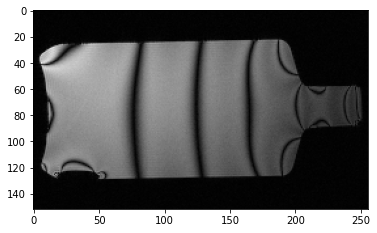

In [7]:
plt.imshow(abs(M[70,:,:]), cmap='gray')

In [8]:
%%capture
M = []
for file in files:
    data = dataloader.read_rawdata(file, is3D=True, doChaAverage = True, doAveAverage = True);
    M.append(data['data'])

In [9]:
for m in M:
    print(m.shape)

(128, 152, 256)
(128, 152, 256)
(128, 152, 256)
(128, 152, 256)
(128, 152, 256)
(128, 152, 256)
(128, 152, 256)
(128, 152, 256)


In [10]:
Mall = np.stack(M)
print(np.max(abs(Mall)), np.min(abs(Mall)), np.mean(abs(Mall)), np.std(abs(Mall)))
vmax = np.mean(abs(Mall) + 2 * np.std(abs(Mall)))

1.8444889273781042e-07 3.154812141878009e-11 2.3903996772531214e-08 3.0238235266477016e-08


In [20]:
m0 = np.stack(M[0:4], axis=-1)
m1 = np.stack(M[4:8], axis=-1)
m2 = np.concatenate((m0, m1), axis=0)
m2.shape

(256, 152, 256, 4)

In [11]:
Mall.shape

(8, 128, 152, 256)

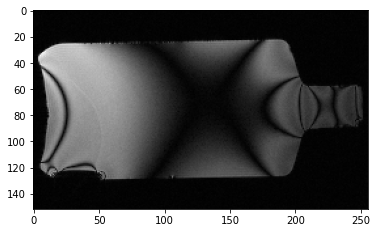

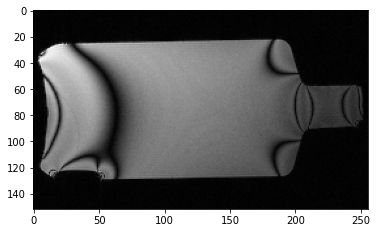

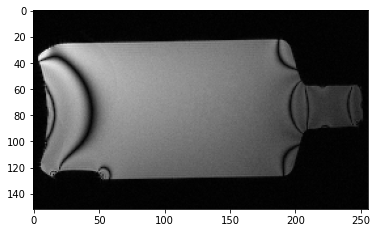

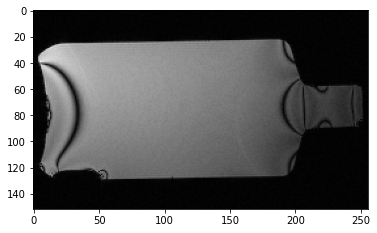

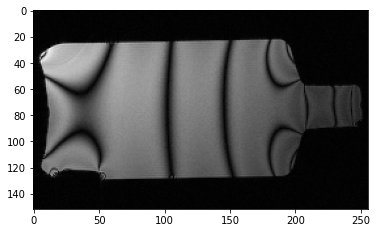

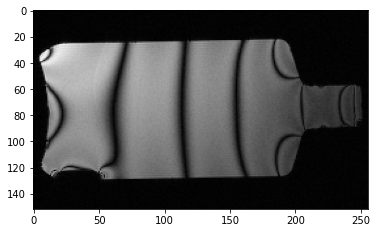

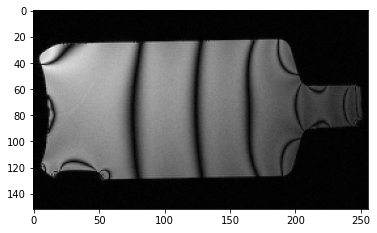

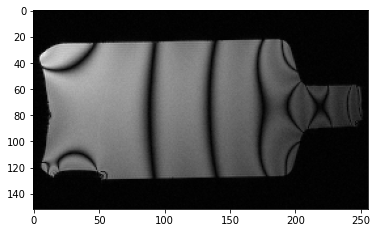

In [12]:
for m in M:
    plt.imshow(abs(m[64,:, :]), cmap='gray')
    plt.show()